___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 6<br><br>Image Classification with CNN<br><br>CIFAR-10 Data<br><h1>

# Dataset Info

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Here are the classes in the dataset, as well as 10 random images from each:

![3Dto2D](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [105]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

In [106]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [107]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [108]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

(32, 32, 3) deki 3 ile RGB oldugunu anladim

In [109]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

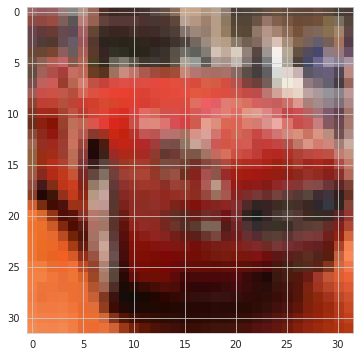

In [110]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [111]:
y_train[5]

array([1], dtype=uint8)

In [112]:
y_train.shape

(50000, 1)

In [113]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [114]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [115]:
# pd.Series(y_train.flatten()).value_counts() => yukaridaki ile benzer sonucu verir

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [116]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [117]:
y_train[0]

array([6], dtype=uint8)

In [118]:
classes[y_train[0][0]]

'frog'

In [119]:
classes[int(y_train[0])]

'frog'

In [120]:
#int(np.random.randint(low=0, high=50000, size=1))

In [121]:
#X_train[int(np.random.randint(low=0, high=50000, size=1))]

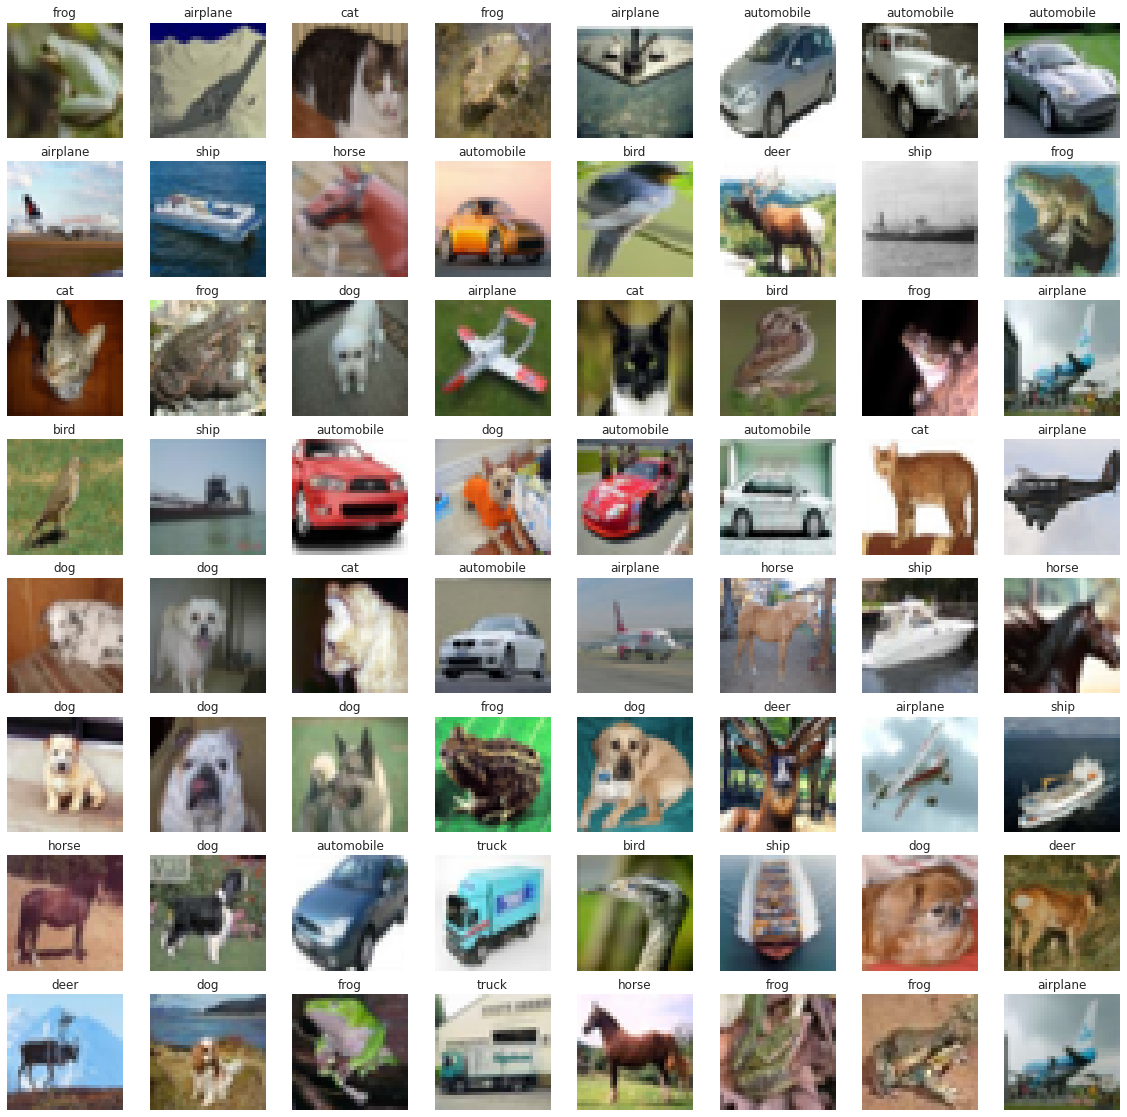

In [122]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))  # random 64 tane resim getirdim
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

In [123]:
X_train[5].min()

0

In [124]:
X_train[5].max()

252

In [125]:
# Normalize image pixels  # normalize ediyorum. 0-1 yaptim

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [126]:
X_train[5].min()

0.0

In [127]:
X_train[5].max()

0.9882353

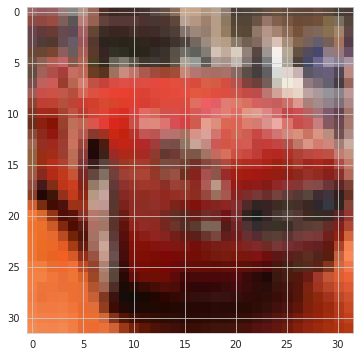

In [128]:
plt.imshow(X_train[5])

In [129]:
X_train.shape, X_test.shape  # asagidaki 4lü cikti gelmeseydi "reshape" yapmam gerekirdi

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [130]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [131]:
from tensorflow.keras.utils import to_categorical

In [132]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [133]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Modelling-1

In [134]:
from tensorflow.keras.models import Sequential  # ardisik
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
# Dense deyince FullyConnected old. anliyorum 
# Dropout rast gele bloke ediyor. overfitting'i engellemek icin kullanilir.
# OF icin EarlyStop da kullaniyordum

In [135]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))  # resim büyükse baslangicta kernel_size=(3,3) yerine (7, 7) daha iyi olabilir

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())  # genelde ilk katmanlarda büyük sayilar

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 resim vardi, cikista onlardan birini isaret etsin diye 10

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [136]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [137]:
from tensorflow.keras.callbacks import EarlyStopping

In [138]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [139]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4321 - accuracy: 0.4829 - val_loss: 1.2023 - val_accuracy: 0.5640
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0564 - accuracy: 0.6262 - val_loss: 0.9991 - val_accuracy: 0.6470
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9190 - accuracy: 0.6783 - val_loss: 0.9419 - val_accuracy: 0.6709
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8241 - accuracy: 0.7097 - val_loss: 0.9620 - val_accuracy: 0.6660
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7498 - accuracy: 0.7359 - val_loss: 0.8825 - val_accuracy: 0.6985
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6890 - accuracy: 0.7582 - val_loss: 0.8836 - val_accuracy: 0.6991
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6306 - accuracy: 0.7759 - val_loss: 0.8949 - val_accuracy:

In [140]:
model.metrics_names

['loss', 'accuracy']

In [141]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,1.432,0.483,1.202,0.564
1,1.056,0.626,0.999,0.647
2,0.919,0.678,0.942,0.671
3,0.824,0.710,0.962,0.666
4,0.750,0.736,0.883,0.698
5,0.689,0.758,0.884,0.699
6,0.631,0.776,0.895,0.700


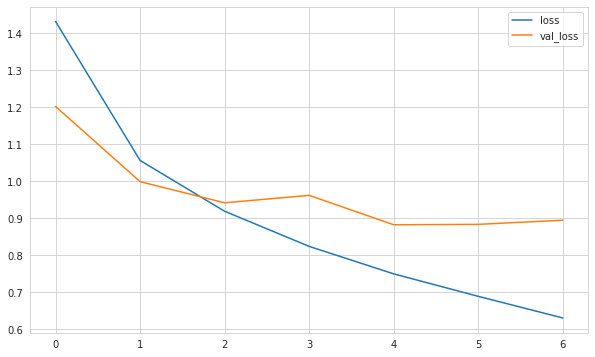

In [142]:
summary[["loss", "val_loss"]].plot();

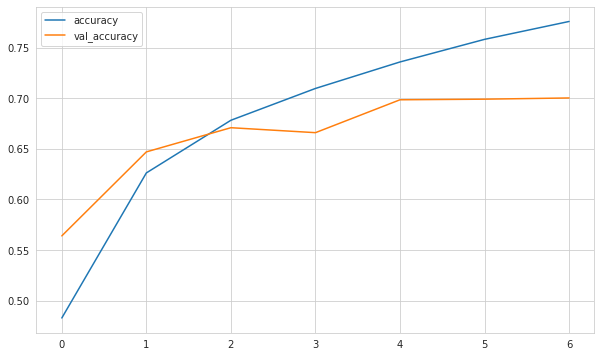

In [143]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [144]:
from sklearn.metrics import classification_report, confusion_matrix

In [145]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8825 - accuracy: 0.6985


[0.8825374245643616, 0.6984999775886536]

In [146]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8825374245643616
Test accuracy: 0.6984999775886536


In [147]:
pred_prob = model.predict(X_test)

In [148]:
y_pred = np.argmax(pred_prob, axis=1)

In [149]:
y_pred

array([8, 8, 8, ..., 5, 1, 7])

In [150]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.84      0.77      0.80      1000
           2       0.62      0.54      0.57      1000
           3       0.55      0.44      0.49      1000
           4       0.67      0.63      0.65      1000
           5       0.62      0.60      0.61      1000
           6       0.70      0.83      0.76      1000
           7       0.81      0.72      0.76      1000
           8       0.75      0.86      0.80      1000
           9       0.72      0.83      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



In [151]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [152]:
print(confusion_matrix(y_test, y_pred))

[[751  14  42  14  12   6  13   5  91  52]
 [ 19 774   6   5   0   1   8   1  51 135]
 [ 92  10 536  44  86  72  93  28  21  18]
 [ 30  16  72 443  69 172  95  37  32  34]
 [ 46   5  69  58 634  35  81  48  19   5]
 [ 29   2  51 144  46 603  48  41  22  14]
 [ 15   7  36  41  25  11 832   4  17  12]
 [ 29   7  41  32  65  58  12 720   6  30]
 [ 50  26  11   7   4   6   7   0 857  32]
 [ 29  65   3  17   2   5   6   6  32 835]]


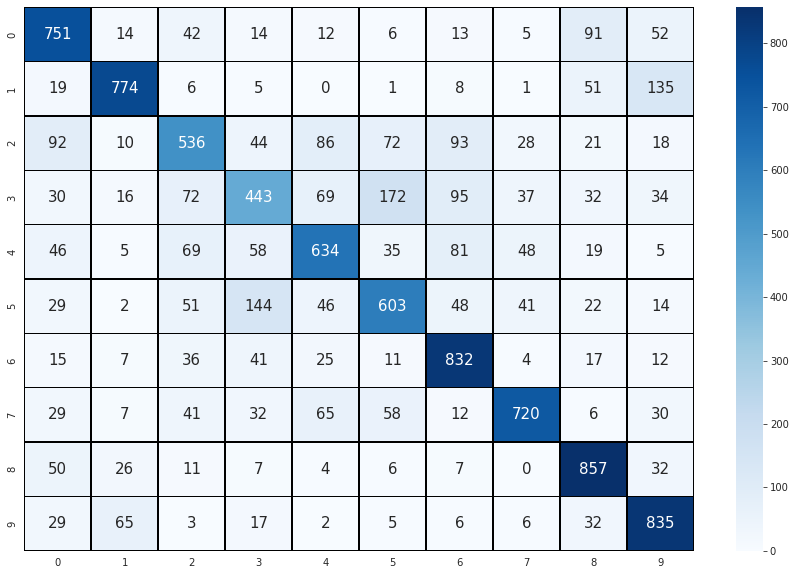

In [153]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# Modelling-2

In [154]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))  # yukarida OF icin ES kullandim simdi DO
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [155]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                 

In [156]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4624 - accuracy: 0.4666 - val_loss: 1.1024 - val_accuracy: 0.6142
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0496 - accuracy: 0.6281 - val_loss: 0.9340 - val_accuracy: 0.6777
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9117 - accuracy: 0.6789 - val_loss: 0.8396 - val_accuracy: 0.7119
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8207 - accuracy: 0.7125 - val_loss: 0.8049 - val_accuracy: 0.7256
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7614 - accuracy: 0.7333 - val_loss: 0.8012 - val_accuracy: 0.7213
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7141 - accuracy: 0.7491 - val_loss: 0.7381 - val_accuracy: 0.7469
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6798 - accuracy: 0.7601 - val_loss: 0.7084 - val_accur

In [157]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,1.462,0.467,1.102,0.614
1,1.050,0.628,0.934,0.678
2,0.912,0.679,0.840,0.712
3,0.821,0.713,0.805,0.726
4,0.761,0.733,0.801,0.721
5,0.714,0.749,0.738,0.747
6,0.680,0.760,0.708,0.756
7,0.645,0.773,0.717,0.753
8,0.623,0.778,0.698,0.757
9,0.593,0.790,0.673,0.769


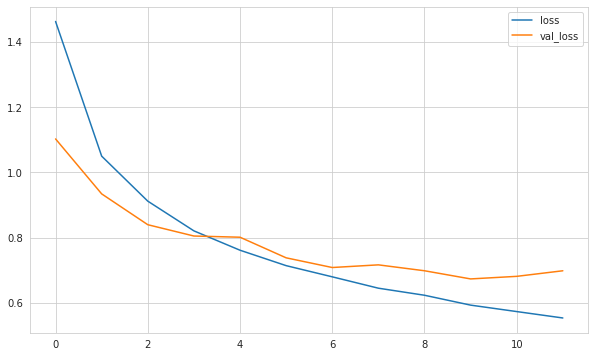

In [158]:
summary[["loss", "val_loss"]].plot();

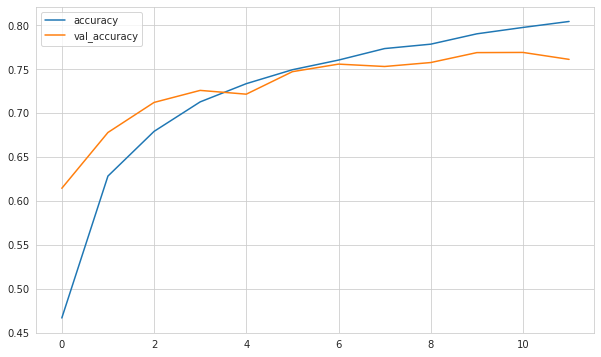

In [159]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [160]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6734 - accuracy: 0.7686


[0.6734177470207214, 0.7685999870300293]

In [161]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6734177470207214
Test accuracy: 0.7685999870300293


In [162]:
pred_prob = model.predict(X_test)

In [163]:
y_pred = np.argmax(pred_prob, axis=1)

In [164]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.88      0.88      0.88      1000
           2       0.73      0.58      0.65      1000
           3       0.57      0.57      0.57      1000
           4       0.73      0.75      0.74      1000
           5       0.63      0.71      0.67      1000
           6       0.80      0.84      0.82      1000
           7       0.84      0.83      0.84      1000
           8       0.88      0.86      0.87      1000
           9       0.85      0.85      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



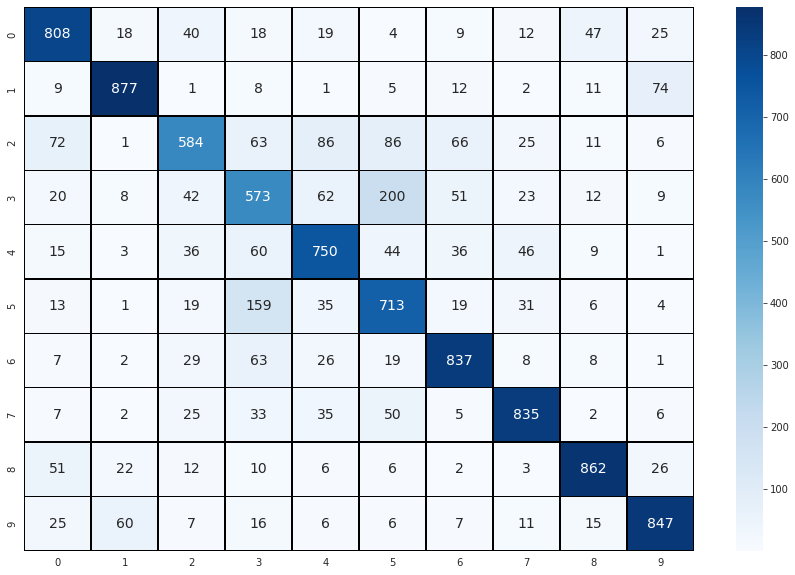

In [166]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [167]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Modelling-3

In [168]:
from tensorflow.keras.layers import BatchNormalization

**BatchNormalization**

- Layer that normalizes its inputs.
- Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    - Technique for training very deep neural networks.
    - Standardizes the inputs to a layer for each mini-batch.
    - Stabilizes the learning process,
    - Reduces the number of training epochs.
![BN1.PNG](https://miro.medium.com/max/709/0*2qZOVh96GZ-a_XdS.png)
![BN2.PNG](https://cesarlaurent.files.wordpress.com/2015/04/bn.png)
![BN3.PNG](https://3.bp.blogspot.com/-ogeLSVo_Tek/WNPS4Glmd4I/AAAAAAAAKBo/bfp-KUSsFmQGolE0uNEeWFzDXA8IPU75wCLcB/s1600/Screenshot%2Bfrom%2B2017-03-23%2B21-50-33.png)

In [169]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [170]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [171]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 17s 10ms/step - loss: 1.9276 - accuracy: 0.3136 - val_loss: 1.4981 - val_accuracy: 0.4539
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4277 - accuracy: 0.4863 - val_loss: 1.3083 - val_accuracy: 0.5319
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2328 - accuracy: 0.5696 - val_loss: 0.9542 - val_accuracy: 0.6548
Epoch 4/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.1078 - accuracy: 0.6174 - val_loss: 0.8908 - val_accuracy: 0.6880
Epoch 5/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0150 - accuracy: 0.6601 - val_loss: 0.9513 - val_accuracy: 0.6660
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9435 - accuracy: 0.6876 - val_loss: 0.8242 - val_accuracy: 0.7147
Epoch 7/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8845 - accuracy: 0.7094 - val_loss: 0.8709 - 

In [172]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.928,0.314,1.498,0.454
1,1.428,0.486,1.308,0.532
2,1.233,0.570,0.954,0.655
3,1.108,0.617,0.891,0.688
4,1.015,0.660,0.951,0.666


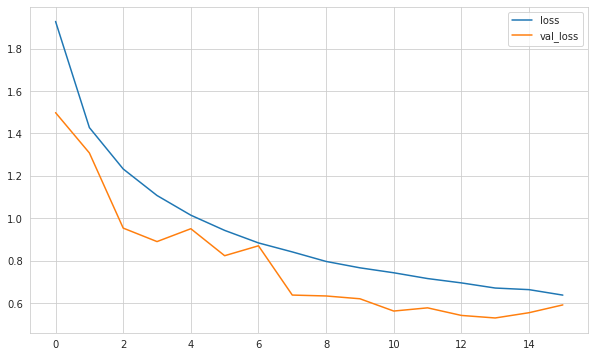

In [173]:
summary[["loss", "val_loss"]].plot();

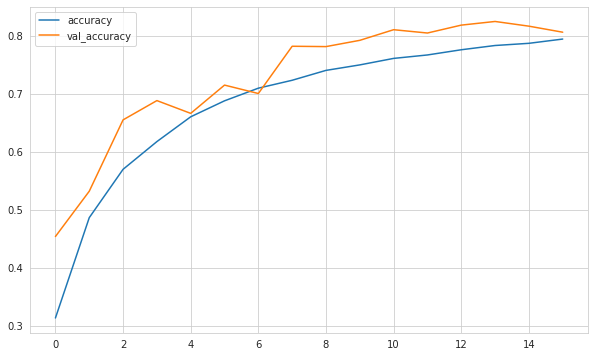

In [174]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [175]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.5309 - accuracy: 0.8243


[0.5308991074562073, 0.8242999911308289]

In [176]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5308991074562073
Test accuracy: 0.8242999911308289


In [177]:
pred_prob = model.predict(X_test)

In [178]:
y_pred = np.argmax(pred_prob, axis=1)

In [179]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [180]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.91      0.92      0.92      1000
           2       0.84      0.67      0.75      1000
           3       0.64      0.73      0.68      1000
           4       0.77      0.84      0.80      1000
           5       0.80      0.67      0.73      1000
           6       0.79      0.92      0.85      1000
           7       0.91      0.84      0.88      1000
           8       0.90      0.91      0.90      1000
           9       0.90      0.90      0.90      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



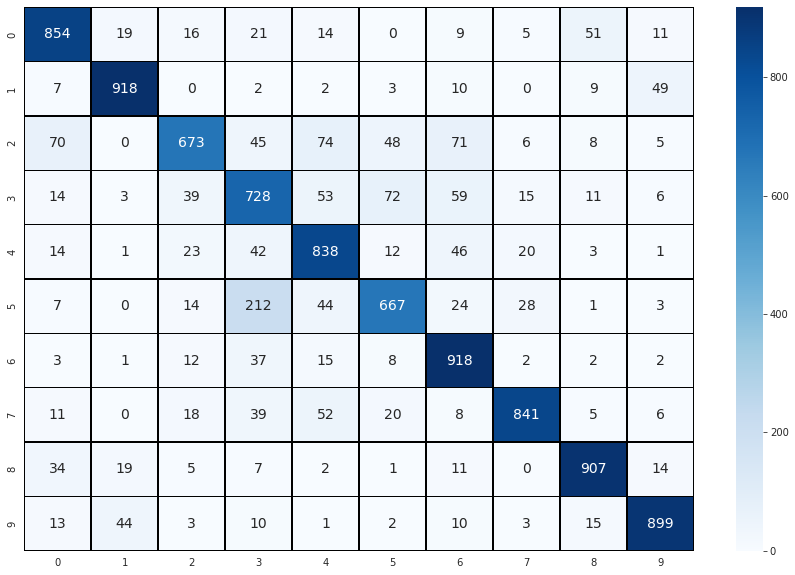

In [181]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Prediction

In [182]:
my_image = X_test[44]

In [183]:
my_image.shape

(32, 32, 3)

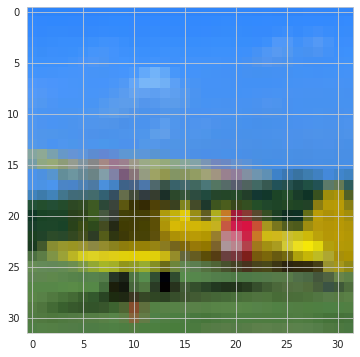

In [184]:
plt.imshow(my_image)

In [185]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))  # reshape yaptim, asagida farkli sekilde yaptim

In [186]:
image_prediction

array([[9.99040902e-01, 3.07864029e-05, 3.33595293e-04, 1.83788434e-05,
        5.88092116e-05, 6.54362975e-06, 2.63505785e-06, 1.17472355e-05,
        4.26174287e-04, 7.03520636e-05]], dtype=float32)

In [187]:
np.argmax(image_prediction, axis=1)

array([0])

In [188]:
result=np.argmax(image_prediction, axis=1)

In [189]:
result

array([0])

In [190]:
classes[int(result)]

'airplane'

In [191]:
model.save("cnn-1.h5")

In [192]:
# finished

In [193]:
model=tf.keras.models.load_model('cnn-1.h5')

In [194]:
X_test[15].shape

(32, 32, 3)

In [195]:
np.expand_dims(X_test[15],axis=0).shape  # reshape yaptim, yukarida farkli sekilde yapmistim

(1, 32, 32, 3)

In [196]:
pred=model.predict(np.expand_dims(X_test[15],axis=0))

In [197]:
np.argmax(pred)

8

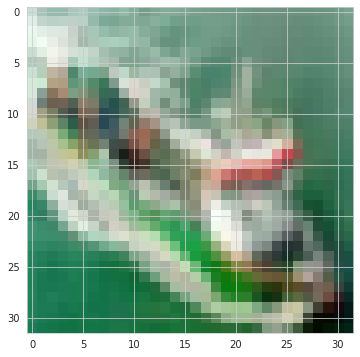

In [198]:
plt.imshow(X_test[15])

In [199]:
classes[8]

'ship'